In [2]:
%cd ..\..

C:\Users\ricks\source\repos\Modern-Time-Series-Forecasting-with-Python


In [56]:
import pandas as pd

df = pd.read_csv("data\stock_prices\SPY US Equity#PX_LAST.csv", names=["date","price"], skiprows=1, index_col="date", parse_dates=True)
df.head()

,price
date,
2003-10-14,105.27
2003-10-15,104.99
2003-10-16,105.41
2003-10-17,104.26
2003-10-20,105.04


<Axes: xlabel='date'>

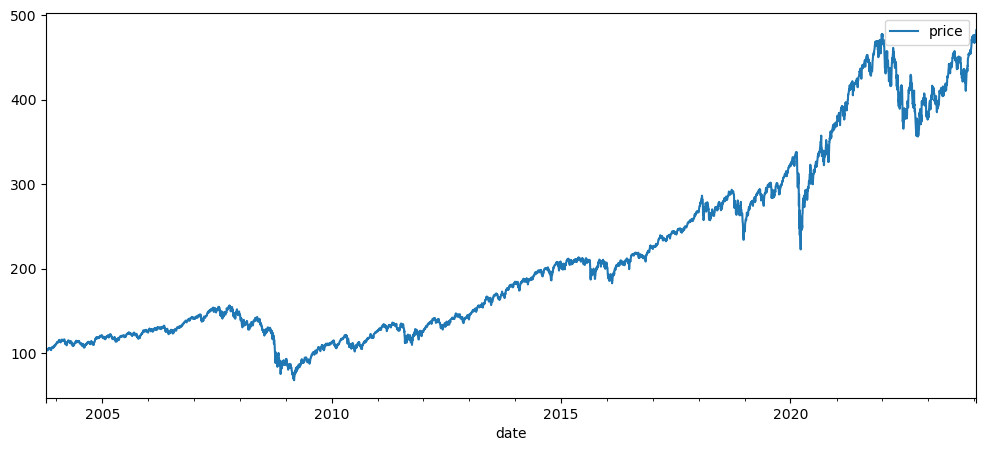

In [45]:
#df.plot(x="date", y="price", figsize=(12,5))
df.plot(figsize=(12,5))

In [46]:
df.resample("M").mean()

,price
date,
2003-10-31,104.632143
2003-11-30,105.516500
2003-12-31,108.629565
2004-01-31,113.505909
2004-02-29,114.764500
...,...
2023-09-30,440.468571
2023-10-31,425.657273
2023-11-30,445.697273


<Axes: xlabel='date'>

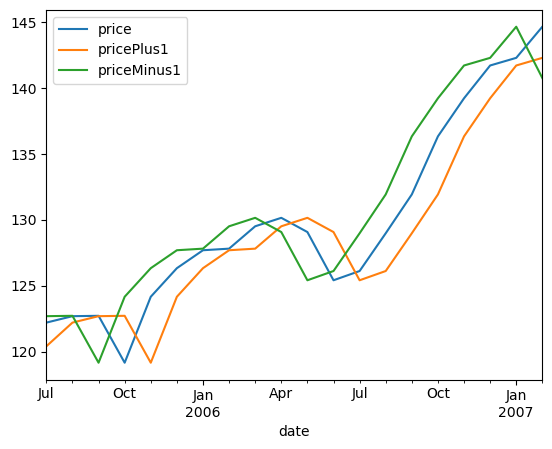

In [70]:
src = pd.DataFrame(df.resample("M").mean())
src["pricePlus1"] = src["price"].shift(1)
src["priceMinus1"] = src["price"].shift(-1)
src = src.dropna().iloc[20:40]
src.plot()